# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import datetime as dt

sns.set_style('darkgrid')

In [47]:
# --- Utility Functions ---
def compute_log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

def normality_test_results(log_returns):
    p = stats.normaltest(log_returns)[1]
    conclusion = "Not Normal" if p < 0.05 else "Possibly Normal"
    return p, conclusion

def remove_outliers(data, z_thresh=2.5):
    data = data.values.flatten()
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[z_scores < z_thresh]

def test_normality_over_time(log_returns, window=126):
    results = []
    for i in range(0, len(log_returns) - window + 1, window):
        segment = log_returns[i:i + window]
        p_val = stats.normaltest(segment)[1]
        results.append((i, segment.index[0], p_val))
    return results

In [48]:
# --- Stock Symbols and Date Range ---
symbols = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'NVDA', 'JNJ', 'JPM', 'WMT', 'XOM', 'T']
start_date = dt.datetime.today() - dt.timedelta(days=10*365)
end_date = dt.datetime.today()

log_return_dict = {}
p_value_summary = []

# --- Download Data and Run Normality Tests ---
for sym in symbols:
    df = yf.download(sym, start=start_date, end=end_date)
    if df.empty: continue
    log_ret = compute_log_returns(df['Close'])
    log_return_dict[sym] = log_ret
    p, conclusion = normality_test_results(log_ret)
    print(sym, p, conclusion)
    p_value_summary.append({'Symbol': sym, 'Overall p-value': np.round(p, 4), 'Conclusion': conclusion})

[*********************100%***********************]  1 of 1 completed


AAPL [6.4464374e-75] Not Normal


[*********************100%***********************]  1 of 1 completed


MSFT [2.93011743e-85] Not Normal


[*********************100%***********************]  1 of 1 completed


GOOG [1.92288738e-70] Not Normal


[*********************100%***********************]  1 of 1 completed


TSLA [4.6405077e-55] Not Normal


[*********************100%***********************]  1 of 1 completed


NVDA [2.87577083e-78] Not Normal


[*********************100%***********************]  1 of 1 completed


JNJ [4.35842957e-115] Not Normal


[*********************100%***********************]  1 of 1 completed


JPM [6.33081052e-113] Not Normal


[*********************100%***********************]  1 of 1 completed


WMT [8.28270629e-123] Not Normal


[*********************100%***********************]  1 of 1 completed


XOM [2.42501446e-76] Not Normal


[*********************100%***********************]  1 of 1 completed

T [3.27050162e-108] Not Normal


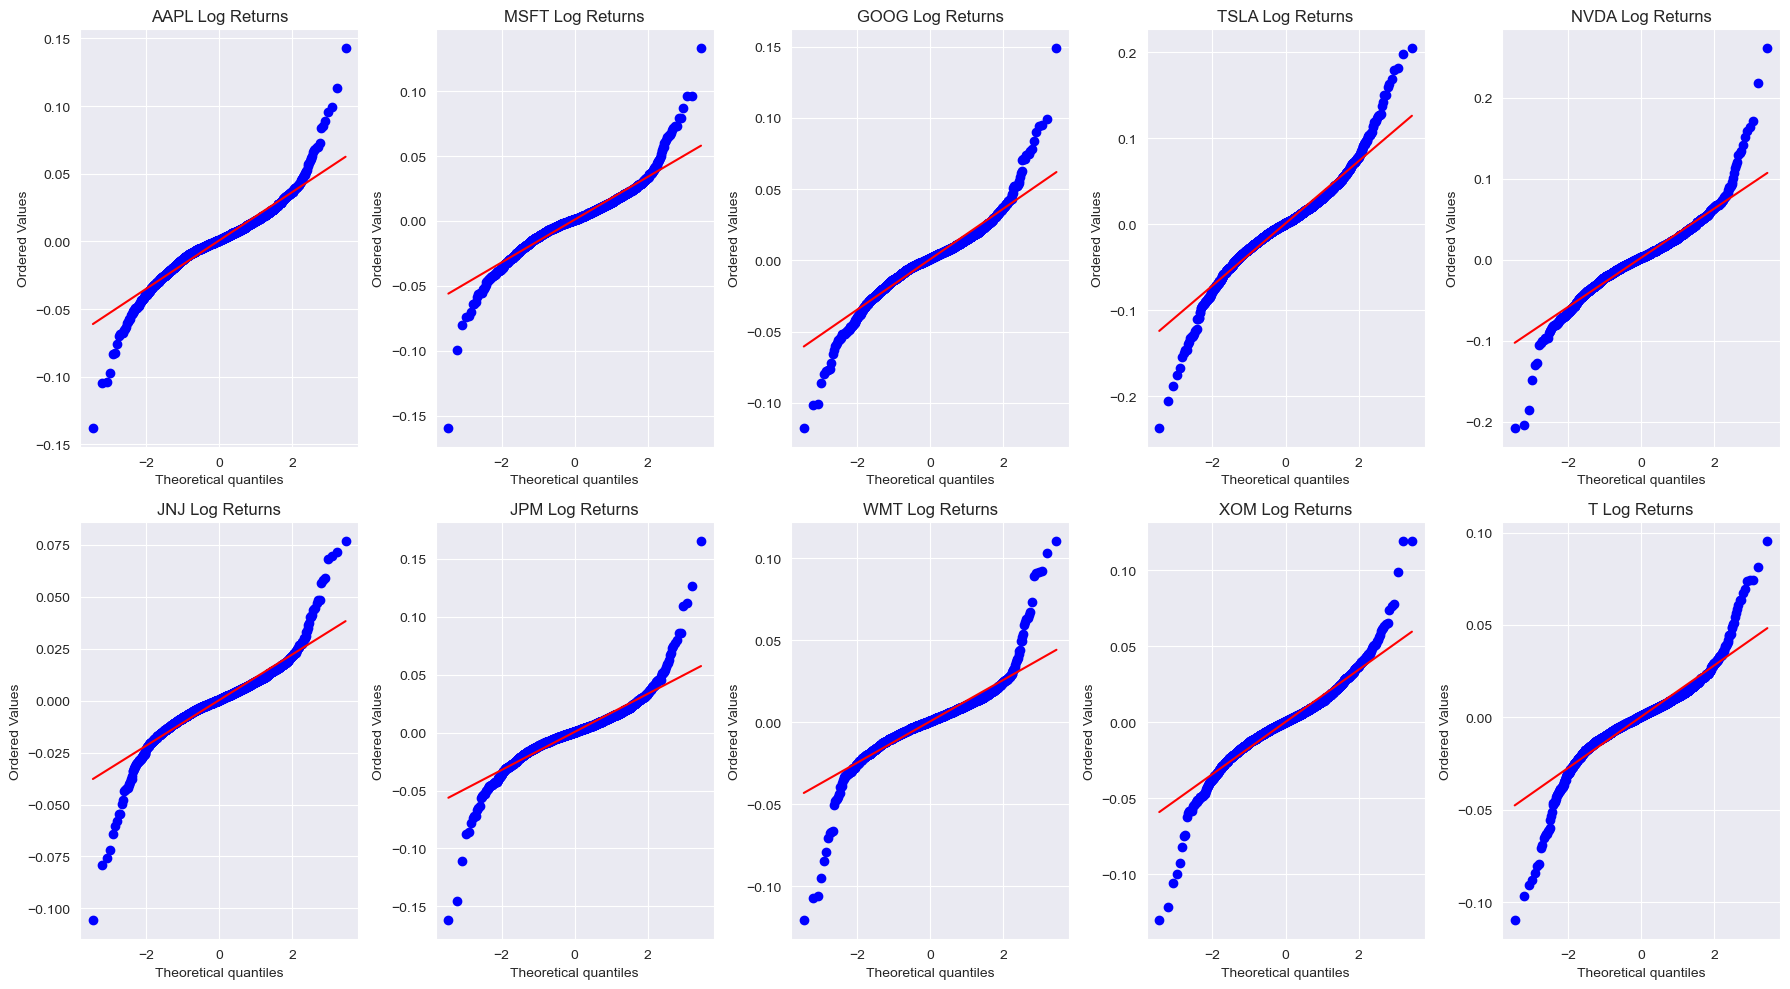

In [49]:
# --- Visualize Probability Plots ---
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()
for i, (sym, log_ret) in enumerate(log_return_dict.items()):
    log_ret = log_ret.values.flatten()
    stats.probplot(log_ret, dist="norm", plot=axes[i])
    axes[i].set_title(f"{sym} Log Returns")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

[6.4464374e-75] 1.5858741314863964e-14


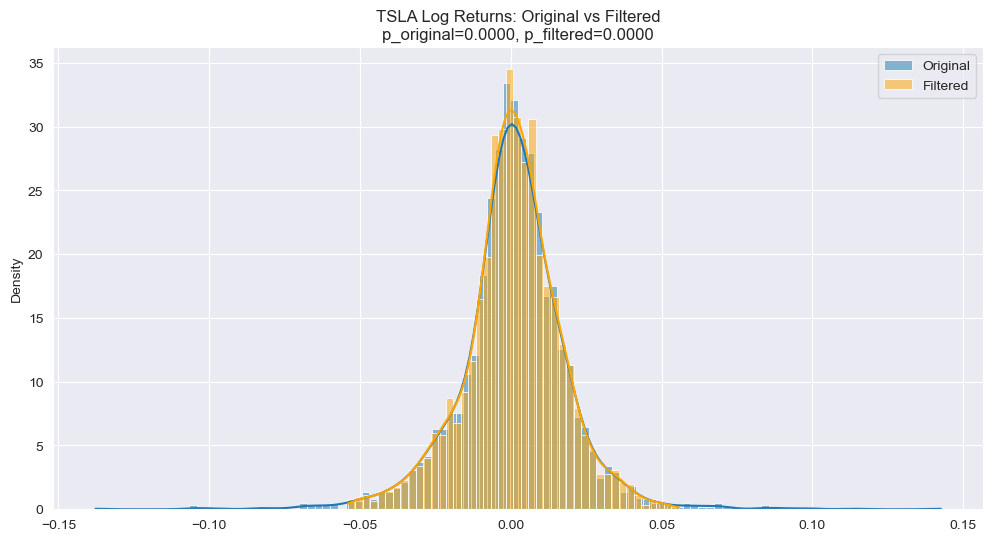

In [55]:

# --- Outlier Effect  ---
original = log_return_dict['AAPL']
filtered = remove_outliers(original, z_thresh=3.0)

p_original, _ = normality_test_results(original)
p_filtered, _ = normality_test_results(filtered)
print(p_original, p_filtered)
plt.figure(figsize=(12, 6))
sns.histplot(original, color='blue', label='Original', stat='density', kde=True)
sns.histplot(filtered, color='orange', label='Filtered', stat='density', kde=True)
plt.title(f"TSLA Log Returns: Original vs Filtered\np_original={p_original[0]:.4f}, p_filtered={p_filtered:.4f}")
plt.legend()
plt.show()

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_14808/445258727.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lambda x: float(x[0]) if isinstance(x, list) else float(x)


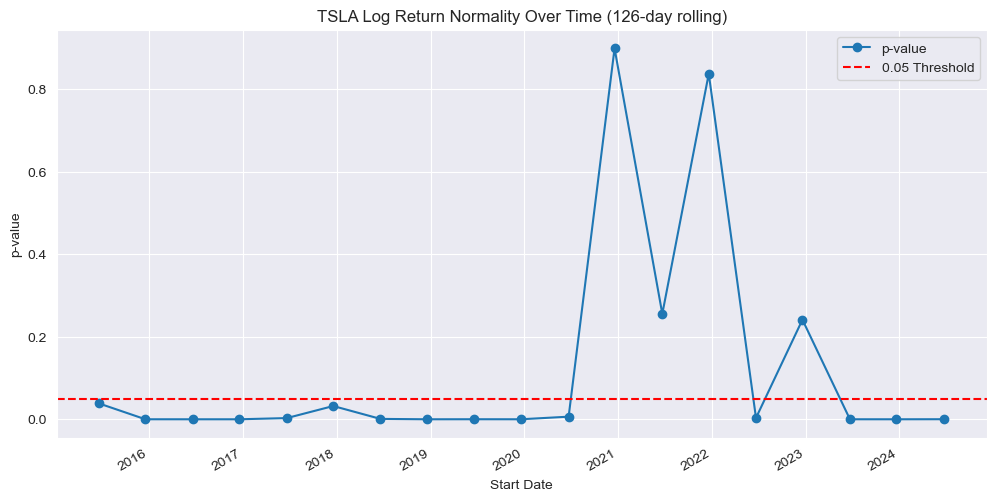

In [ ]:
# --- Rolling Normality Test ---
rolling_results = test_normality_over_time(original, window=126)
rolling_df = pd.DataFrame(rolling_results, columns=["Window", "Start Date", "p-value"])
rolling_df.set_index("Start Date", inplace=True)
# rolling_df['p-value'][:]
rolling_df["p-value"] = rolling_df["p-value"].apply(
    lambda x: float(x[0]) if isinstance(x, list) else float(x)
)

plt.figure(figsize=(12, 6))
rolling_df["p-value"].plot(marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='0.05 Threshold')
plt.title("TSLA Log Return Normality Over Time (126-day rolling)")
plt.ylabel("p-value")
plt.legend()
plt.show()

In [67]:

# --- Portfolio Normality (AAPL, MSFT, GOOG) ---
portfolio_returns = (log_return_dict['AAPL'] + log_return_dict['MSFT'] + log_return_dict['GOOG']) / 3
portfolio_returns.dropna(inplace=True)
p_portfolio, conclusion_portfolio = normality_test_results(portfolio_returns)

plt.figure(figsize=(10, 6))
stats.probplot(portfolio_returns, dist="norm", plot=plt)
plt.title(f"Custom Portfolio Log Returns\np-value={p_portfolio:.4f}, Conclusion: {conclusion_portfolio}")
plt.grid(True)
plt.show()



/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_14808/1891282817.py:6: SmallSampleWarning: All axis-slices of one or more sample arguments are too small; all elements of returned arrays will be NaN. See documentation for sample size requirements.
  p = stats.normaltest(log_returns)[1]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# --- Summary Table ---
summary_df = pd.DataFrame(p_value_summary)
summary_df.sort_values("Overall p-value", ascending=False, inplace=True)
print("\n📊 Summary of Normality Test Results:")
print(summary_df.to_string(index=False))